<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports,-File-Calling,-Data" data-toc-modified-id="Imports,-File-Calling,-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports, File Calling, Data</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Multi-file-call" data-toc-modified-id="Multi-file-call-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multi-file call</a></span></li><li><span><a href="#Direct-File-Calling" data-toc-modified-id="Direct-File-Calling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Direct File Calling</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Single Call</a></span></li><li><span><a href="#Multiple-Call" data-toc-modified-id="Multiple-Call-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Multiple Call</a></span><ul class="toc-item"><li><span><a href="#Zip-List" data-toc-modified-id="Zip-List-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Zip List</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Cycle-Lifetime" data-toc-modified-id="Cycle-Lifetime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cycle Lifetime</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single Call</a></span></li><li><span><a href="#Multiple-Call" data-toc-modified-id="Multiple-Call-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multiple Call</a></span></li></ul></li><li><span><a href="#DQDV" data-toc-modified-id="DQDV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DQDV</a></span><ul class="toc-item"><li><span><a href="#Single-Call" data-toc-modified-id="Single-Call-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Single Call</a></span><ul class="toc-item"><li><span><a href="#Cycle---defined" data-toc-modified-id="Cycle---defined-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Cycle - defined</a></span></li><li><span><a href="#Offsets" data-toc-modified-id="Offsets-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Offsets</a></span><ul class="toc-item"><li><span><a href="#Classic-ridgeline-with-labels" data-toc-modified-id="Classic-ridgeline-with-labels-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Classic ridgeline with labels</a></span></li><li><span><a href="#All-cycles-with-select-bolding" data-toc-modified-id="All-cycles-with-select-bolding-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>All cycles with select bolding</a></span></li></ul></li><li><span><a href="#All-Cycles---overlaid" data-toc-modified-id="All-Cycles---overlaid-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>All Cycles - overlaid</a></span></li></ul></li><li><span><a href="#File-Selector---Multiple-Files" data-toc-modified-id="File-Selector---Multiple-Files-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>File Selector - Multiple Files</a></span><ul class="toc-item"><li><span><a href="#Multi-File-call,-single-cycle" data-toc-modified-id="Multi-File-call,-single-cycle-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Multi-File call, single cycle</a></span></li><li><span><a href="#Multiple-Cycle-Call" data-toc-modified-id="Multiple-Cycle-Call-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Multiple Cycle Call</a></span></li></ul></li></ul></li><li><span><a href="#Colormaps" data-toc-modified-id="Colormaps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Colormaps</a></span></li></ul></div>

# Imports, File Calling, Data

## Imports

Add and remove the imports as needed. I keep this in a snippet, and remove the imports I don't need before plotting. 

In [1]:
#This is excessive - I experimented too much and now there's no going back

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib.pyplot import cm
from matplotlib.text import OffsetFrom
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import math
from pylab import rcParams
from pylab import figure
from pandas import read_excel 
import ipywidgets as widgets #change matplotlib to nbagg to make interative
from itertools import cycle
matplotlib.rcParams['font.family'] = 'cambria' 
matplotlib.rcParams['figure.figsize'] = 10, 6 #assign a size for figures

%matplotlib inline 
#change to nbagg for interactive
import glob #ID files - use if you want to iterate over a bunch of files in a 
    #folder with a different path than this one

#define sub/superscripts
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("C2H5OH".translate(subscript))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
print("PIr2".translate(superscript).replace('PI', 'π'))

C₂H₅OH
πr²


## Multi-file call

I use glob to import files. That way, I can import a bunch of files from a specified path. You can instead just copy and paste notebooks into the path that matches your data location, but I do it this way so I can just use the same notebook over and over without moving it or copying it.

In [2]:
#Make an array of files in the same dir - only works if all desired files
#in the same folder (can be in separate subfolders)

x = []

for item in glob.glob("path_folder/*.xlsx"):
    x.extend([
        item
    ])
x.sort()
x = [x]

for num,param in enumerate(x):      #change based on num files
    file1 = param[0]
    file2 = param[1]
    file3 = param[2]
    file4 = param[3]
    file5 = param[4]
files = [[file1,file2,file3,file4,file5]]
    
print(files)

IndexError: list index out of range

## Direct File Calling

In [2]:
file1 = 'file_path.xlsx'
#file2 = ''
#file3 = ''
#file4 = ''
#file5 = ''

## Data

### Single Call

This is for a single data-call. If you have multiple datasets that you want to compare ignore this.

In [18]:
#New Arbin

discharge_index = 3    #look at sdu file
charge_index = 4       
mass = 0.0000402108       #mass of active material in grams

data = pd.read_excel(file1, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle = data.groupby(['cycle','step']) 
cycle_data = pd.read_excel(file1,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles = data['cycle'].iat[-1]-1


In [5]:
#Old Arbin

discharge_index = 3    #look at sdu file
charge_index = 4       
mass = 0.0000402108          #mass of active material in grams
X = [1,2,3] #sheets with full data - each sheet = 100 cycles
CS = 4      #cycle sheet

data = pd.DataFrame()

for x in X: 
    df = pd.read_excel(file7, 
                       sheet_name=x, 
                       usecols='B,E,F,H,I,J',
                       names=['time','step','cycle','voltage','charge','discharge'])
    data = pd.concat([data,df],axis=0)
    
data_by_cycle = data.groupby(['cycle','step']) 
cycle_data = pd.read_excel(file7,  
        sheet_name=4,                        
        usecols='A,F,G',    
        names=['cycle','charge','discharge'])  
num_cycles = data['cycle'].iat[-1]-2

print(num_cycles)

256


### Multiple Call

These are making datasets for each file. Copy/paste if you need more.

In [6]:
data1 = pd.read_excel(file1, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle1 = data1.groupby(['cycle','step']) 
cycle_data1 = pd.read_excel(file1,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles1 = data1['cycle'].iat[-1]-2

In [7]:
data2 = pd.read_excel(file2, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle2 = data2.groupby(['cycle','step']) 
cycle_data2 = pd.read_excel(file2,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles2 = data2['cycle'].iat[-1]-2

In [8]:
data3 = pd.read_excel(file3, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle3 = data3.groupby(['cycle','step']) 
cycle_data3 = pd.read_excel(file3,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles3 = data3['cycle'].iat[-1]-2

In [9]:
data4 = pd.read_excel(file4, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle4 = data4.groupby(['cycle','step']) 
cycle_data4 = pd.read_excel(file4,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles4 = data4['cycle'].iat[-1]-2

In [10]:
data5 = pd.read_excel(file5, sheet_name=1, 
        usecols='B,D,E,F,H,I', 
        names=['time','step','cycle','voltage','charge','discharge'])

data_by_cycle5 = data5.groupby(['cycle','step']) 
cycle_data5 = pd.read_excel(file5,  
        sheet_name=2,                        
        usecols='E,H,I',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      
num_cycles5 = data5['cycle'].iat[-1]-2

#### Zip List

This whole cell is just for automating some of the plotting. Edit the masses, colors and labels. 

In [11]:
#Edit values here for your materials and preferences

mass1=0.0000402108
mass2=0.000138034
mass3=0.00012736
mass4=0.0000867083
mass5=0.000074388

colorsc = ['red',
           'orange',
           'gold',
           'green',
           'blue']
labelc = ['Sn',
          '3Sn:Sb',
          'SnSb',
          'Sn:3Sb',
          'Sb']


# the rest is making zipped lists for iteration purposes - correspond to variables defined in data call
# add/remove as needed 
filesc = [file1,file2,file3,file4,file5]
datac = [data1,data2,data3,data4,data5]
cycle_datac = [cycle_data1,cycle_data2,cycle_data3,cycle_data4,cycle_data5]
num_cyclesc = [num_cycles1,num_cycles2,num_cycles3,num_cycles4,num_cycles5]
massc = [mass1,mass2,mass3,mass4,mass5]
data_by_cyclec = [data_by_cycle1,data_by_cycle2,data_by_cycle3,data_by_cycle4,data_by_cycle5]

zipped = zip(filesc,datac,cycle_datac,num_cyclesc,colorsc,massc,labelc) #for iteration

# Cycle Lifetime

## Single Call

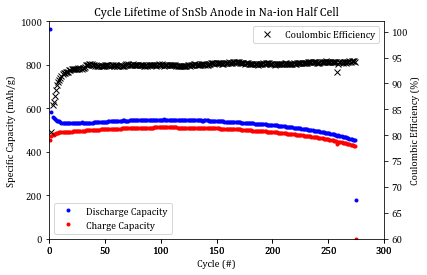

<Figure size 432x288 with 0 Axes>

In [68]:
cycle_fig = figure()

capacity = cycle_fig.add_subplot(111)     
capacity.plot(cycle_data['cycle'],cycle_data['discharge']/mass*1000,'b.', label='Discharge Capacity')
capacity.plot(cycle_data['cycle'],cycle_data['charge']/mass*1000,'r.', label='Charge Capacity')
capacity.set_xlabel('Cycle (#)')
capacity.set_ylabel('Specific Capacity (mAh/g)')
capacity.set_xlim(0,300)
capacity.set_ylim(0,1000)
plt.legend(loc="lower left")

CE = cycle_fig.add_subplot(111, sharex=capacity, frameon=False)    
CE.plot(cycle_data['cycle'],
        (cycle_data['charge']/cycle_data['discharge'])*100,'kx', label='Coulombic Efficiency')
CE.yaxis.tick_right()
CE.yaxis.set_label_position("right")
CE.set_ylabel('Coulombic Efficiency (%)',color='k')   
CE.set_ylim(60,102)

plt.title('Cycle Lifetime of SnSb Anode in Na-ion Half Cell')
plt.legend(loc='upper right')
plt.show()
#plt.savefig('file_name')

## Multiple Call

 I included code for two different legend types, but for this much data, I recommend the second one. The only downside is it's more finicky in it's location if you change the figure size/number of elements. 

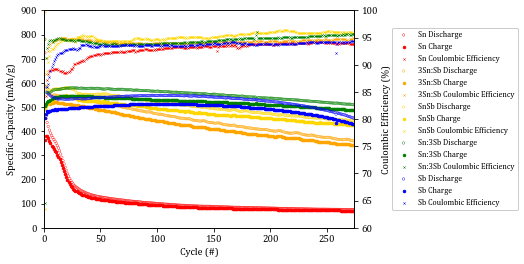

In [14]:
matplotlib.rcParams['figure.figsize'] = 7.5, 4 #(I don't use this)

zipped = zip(filesc,datac,cycle_datac,num_cyclesc,colorsc,massc,labelc)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
s = 6
lw = 0.4

for num,param in enumerate(zipped):
    file = param[0]
    data = param[1]
    cycle_data = param[2]
    num_cycles = param[3]
    color = param[4]
    mass = param[5]
    label1 = param[6]
    ax.scatter(cycle_data['cycle'],cycle_data['discharge']/mass*1000,marker='o',s=s,linewidths=lw,facecolors='none', edgecolors=color,label=label1 +' Discharge')
    ax.scatter(cycle_data['cycle'],cycle_data['charge']/mass*1000,marker='o',c=color,s=s,label=label1 +' Charge')
    ax2.scatter(cycle_data['cycle'],(cycle_data['charge']/cycle_data['discharge'])*100,marker='x',s=s,linewidths=lw,c=color, label=label1 +' Coulombic Efficiency')
    ax.scatter(np.nan,np.nan, marker='x',s=s,linewidths=lw,c=color, label=label1 +' Coulombic Efficiency')  # Make an agent in ax
ax.set_xlabel('Cycle (#)',fontsize=10)
ax.set_ylabel('Specific Capacity (mAh/g)',fontsize=10)
ax.set_xlim(0,274)
ax.set_ylim(0,900)
ax.legend(bbox_to_anchor=(1.11,0.5), loc="center left",fontsize=8,fancybox=True, frameon=True,framealpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Coulombic Efficiency (%)',color='k',fontsize=10)   
ax2.set_ylim(60,100)
plt.subplots_adjust(right=0.7)
#plt.tight_layout(rect=[0,0,0.75,1])
#plt.title('Cycle Lifetime of SnSb Anode in Na-ion Half Cell')
#plt.savefig('SnSb_Compstudies_Cycle_lifetime_large')

plt.show()

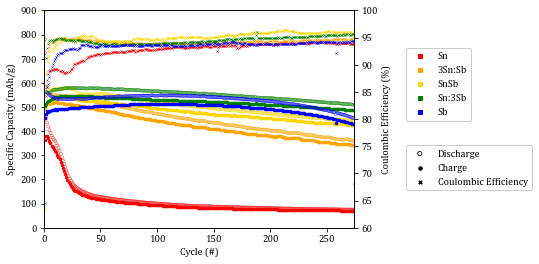

In [13]:
from matplotlib.patches import Patch
matplotlib.rcParams['figure.figsize'] = 7.5, 4 #(I don't use this)

zipped = zip(filesc,datac,cycle_datac,num_cyclesc,colorsc,massc,labelc)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
s = 6
lw = 0.4

for num,param in enumerate(zipped):
    file = param[0]
    data = param[1]
    cycle_data = param[2]
    num_cycles = param[3]
    color = param[4]
    mass = param[5]
    label1 = param[6]
    ax.scatter(cycle_data['cycle'],cycle_data['discharge']/mass*1000,marker='o',s=(1.5*s),linewidths=lw,facecolors='none', edgecolors=color)
    ax.scatter(cycle_data['cycle'],cycle_data['charge']/mass*1000,marker='o',c=color,s=s)
    ax2.scatter(cycle_data['cycle'],(cycle_data['charge']/cycle_data['discharge'])*100,marker='x',s=s,linewidths=lw,c=color)
    #define legend separately for less confusion in plot
    ax.scatter(np.nan,np.nan, marker='s',s=(s*3),c=color, label=label1)  # Make an agent in ax
    if num ==0 :
        ax2.scatter(np.nan,np.nan, marker='o',s=(s*3),linewidths=(lw*2),facecolors='none', edgecolors='black', label='Discharge')
        ax2.scatter(np.nan,np.nan, marker='o',s=(s*2),c='black', label='Charge')
        ax2.scatter(np.nan,np.nan, marker='x',s=(s*2),c='black', label='Coulombic Efficiency')
    else:
        ax2.scatter(np.nan,np.nan, marker='o',s=(s*2),c='black')
        ax2.scatter(np.nan,np.nan, marker='s',s=(s*2),c='black')
        ax2.scatter(np.nan,np.nan, marker='s',s=(s*2),c='black')
ax.set_xlabel('Cycle (#)',fontsize=10)
ax.set_ylabel('Specific Capacity (mAh/g)',fontsize=10)
ax.set_xlim(0,274)
ax.set_ylim(0,900)
ax.legend(bbox_to_anchor=(1.15,0.85), loc="upper left",fontsize=10,fancybox=True, frameon=True,framealpha=1)
ax2.legend(bbox_to_anchor=(1.15,0.15), loc="lower left",fontsize=10,fancybox=True, frameon=True,framealpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Coulombic Efficiency (%)',color='k',fontsize=10)   
ax2.set_ylim(60,100)
plt.subplots_adjust(right=0.7)
#plt.tight_layout(rect=[0,0,0.75,1])
#plt.title('Cycle Lifetime of SnSb Anode in Na-ion Half Cell')
#plt.savefig('SnSb_Compstudies_Cycle_lifetime_large')

plt.show()

# DQDV

## Single Call

### Cycle - defined

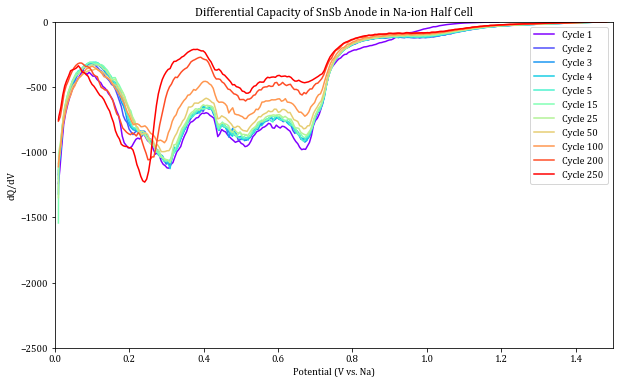

<Figure size 720x432 with 0 Axes>

In [15]:
matplotlib.rcParams['figure.figsize'] = 10, 6 #(I don't use this)
n=11
color=iter(cm.rainbow(np.linspace(0,1,n)))

for cycle in [1,2,3,4,5,15,25,50,100,200,250]:
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    p = plt.plot(voltage, dqdv, c=next(color),label='Cycle '+str(cycle))

    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    plt.plot(voltage, dqdv, color=p[0].get_color()) #label='Cycle '+str(cycle))
    
plt.xlim(0,1.5)
plt.ylim(-2500,0)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title('Differential Capacity of SnSb Anode in Na-ion Half Cell')
plt.legend()
plt.show()
plt.savefig('JRG_01_06022022_timeexp_060222_22_Channel_22_pulled063022_dQdV_1-2-3-4-5-15-25-50-100-200-250_negative')

### Offsets

#### Classic ridgeline with labels

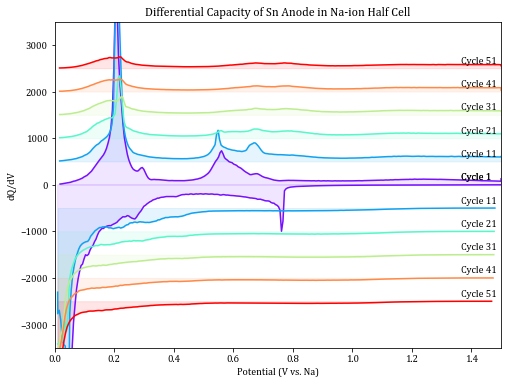

In [33]:
matplotlib.rcParams['figure.figsize'] = 8, 6 

i = 10 #interval

cycles = np.arange(1,52,1) #every cycle
cycles1 = np.arange(1,52,i) #bold cycles
alp = 0.1 #alpha 
o_m = 50 #offset multiplier

#plotting all cycles - inbetween cycles are faded
for cycle in cycles1:
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    
    dqdv = np.array(dqdv)
    o_a = o_m*(cycle - 1)
    dqdv = dqdv - o_a
    o_a_dc = 0-o_a
    o_a_c = 0 + o_a
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(50)))
    plt.fill_between(voltage, dqdv,0 - (o_m*(cycle-1)),color=plt.cm.rainbow(cycle/(50)), alpha=alp)
    plt.annotate('Cycle '+str(cycle), (1.35,o_a_dc), xytext=(5, 5), textcoords="offset pixels")
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    dqdv = dqdv + o_a
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(50)))
    plt.fill_between(voltage, dqdv,0 + (o_m*(cycle-1)),color=plt.cm.rainbow(cycle/(50)), alpha=alp)
    #adds labels to the side
    plt.annotate('Cycle '+str(cycle), (1.35,o_a_c), xytext=(5, 5), textcoords="offset pixels")
plt.xlim(0,1.5)
plt.ylim(-3500,3500)

cmap = mpl.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=1, vmax=50)
cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
#plt.colorbar(cb, label='Cycle')
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title('Differential Capacity of Sn Anode in Na-ion Half Cell')
#plt.legend()
#plt.savefig('JRG_01_06022022_timeexp_060222_22_Channel_22_pulled0630_dQdV_Large_CBAR_13-294_offset_ridgeline')
plt.show()

#### All cycles with select bolding

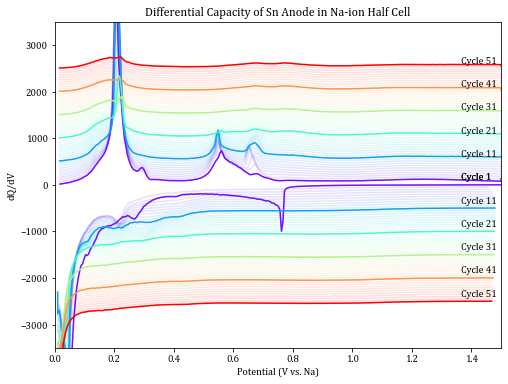

In [31]:
matplotlib.rcParams['figure.figsize'] = 8, 6 

i = 10 #interval

cycles = np.arange(1,52,1) #cycles plotted
cycles1 = np.arange(1,52,i) #bold cycles
alp = 0.15 #alpha for regular cycles
o_m = 50 #offset multiplier

#plotting all cycles - inbetween cycles are faded

for cycle in cycles:
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    dqdv = dqdv - (o_m*(cycle-1))
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/51), alpha = alp)
    
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    dqdv = dqdv + (o_m*(cycle-1))
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(51)),alpha = alp)
    
#plotting interval cycles - bold 
for cycle in cycles1:
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    
    dqdv = np.array(dqdv)
    o_a = o_m*(cycle - 1)
    dqdv = dqdv - o_a
    o_a_dc = 0-o_a
    o_a_c = 0 + o_a
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(51)))
    #plt.fill_between(voltage, dqdv,0 - (o_m*(cycle-1)),color=plt.cm.rainbow(cycle/(50)), alpha=alp)
    plt.annotate('Cycle '+str(cycle), (1.35,o_a_dc), xytext=(5, 5), textcoords="offset pixels")
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    dqdv = np.array(dqdv)
    dqdv = dqdv + o_a
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(51)))
    #plt.fill_between(voltage, dqdv,0 + (o_m*(cycle-1)),color=plt.cm.rainbow(cycle/(50)), alpha=alp)
    #adds labels to the side
    plt.annotate('Cycle '+str(cycle), (1.35,o_a_c), xytext=(5, 5), textcoords="offset pixels")
plt.xlim(0,1.5)
plt.ylim(-3500,3500)

cmap = mpl.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=1, vmax=51)
cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
#plt.colorbar(cb, label='Cycle')
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title('Differential Capacity of Sn Anode in Na-ion Half Cell')
#plt.legend()
#plt.savefig('JRG_01_06022022_timeexp_060222_22_Channel_22_pulled0630_dQdV_Large_CBAR_13-294_offset_ridgeline')
plt.show()

### All Cycles - overlaid

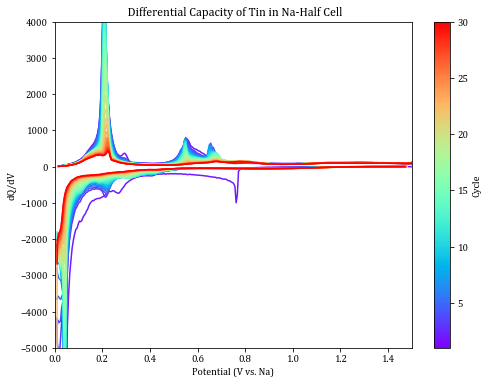

In [39]:
num_cycles=30

for cycle in range(1,num_cycles+1):
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles))
    
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    
    #adds labels to only first and last cycles so legend isn’t huge
    if cycle ==1 or cycle == num_cycles:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(num_cycles)), label = "Cycle "+str(cycle))
    else:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles))


cmap = mpl.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=1, vmax=num_cycles)
cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(cb, label='Cycle')

plt.xlim(0,1.5)
plt.ylim(-5000,4000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title(' Differential Capacity of Tin in Na-Half Cell')
#plt.legend()

#change label
#plt.savefig('_dqdv_sm')
############
plt.show()

## File Selector - Multiple Files

In [ ]:
print(x) #just get a list of filenames to copy/paste

C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\2706145007.py:26: RuntimeWarning: divide by zero encountered in true_divide
  dqdv = np.gradient(discharge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\2706145007.py:32: RuntimeWarning: invalid value encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)


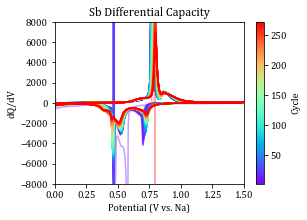

In [42]:
#If you have many files you want to plot separately

Label1 = 'JRG_1_063022_SnSbcomps_1Sn_1_0-5C_22_Channel_22'
Name1 = 'Sn'
Label2 ='JRG_1_063022_SnSbcomps_2Sn3Sn_2_0-5C_29_Channel_29'
Name2 = '3Sn:Sb'
Label3 = 'JRG_1_063022_SnSbcomps_3snsb_4_0-5C_32_Channel_32' 
Name3 = 'SnSb'
Label4 ='JRG_1_063022_SnSbcomps_4SnSb3_1_0-5C_31_Channel_31' 
Name4 = 'Sn:3Sb'
Label5 = 'JRG_1_063022_SnSbcomps_5Sb_0-5C_26_Channel_26'
Name5 = 'Sb'
matplotlib.rcParams['figure.figsize'] = 4, 3 #(I don't use this)

#change last number
Label = Label5
mass = mass5
data_by_cycle = data_by_cycle5
num_cycles = num_cycles5
Name = Name5


for cycle in range(1,num_cycles+1):
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    
    plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles), alpha=0.4)
    
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    
    #adds labels to only first and last cycles so legend isn’t huge
    if cycle ==1 or cycle == num_cycles:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/(num_cycles)), label = "Cycle "+str(cycle))
    else:
        plt.plot(voltage, dqdv, color=plt.cm.rainbow(cycle/num_cycles), alpha=0.4)
plt.tight_layout(pad=1.4)

cmap = mpl.colormaps['rainbow']
norm = matplotlib.colors.Normalize(vmin=1, vmax=num_cycles)
cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(cb, label='Cycle')

plt.xlim(0,1.5)
plt.ylim(-8000,8000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title(Name+' Differential Capacity')
#plt.legend()

#change label
plt.savefig(Label+'_dqdv_sm')
############
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:84: RuntimeWarning: invalid value encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:78: RuntimeWarning: invalid value encountered in true_divide
  dqdv = np.gradient(discharge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:84: RuntimeWarning: invalid value encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:84: RuntimeWarning: invalid value encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:84: RuntimeWarning: divide by zero encountered in true_divide
  dqdv = np.gradient(charge)/np.gradient(voltage)
C:\Users\jessi\AppData\Local\Temp\ipykernel_16816\3229423558.py:84: RuntimeWarning: divide by zero encountered in true_di

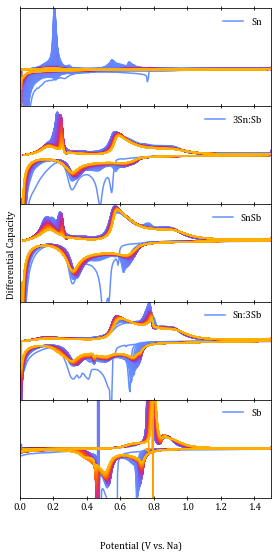

In [43]:
import matplotlib.gridspec as gridspec
legLoc = 'upper right'

Label1 = 'JRG_1_063022_SnSbcomps_1Sn_1_0-5C_22_Channel_22'
Name1 = 'Sn'
Label2 ='JRG_1_063022_SnSbcomps_2Sn3Sn_2_0-5C_29_Channel_29'
Name2 = '3Sn:Sb'
Label3 = 'JRG_1_063022_SnSbcomps_3snsb_4_0-5C_32_Channel_32' 
Name3 = 'SnSb'
Label4 ='JRG_1_063022_SnSbcomps_4SnSb3_1_0-5C_31_Channel_31' 
Name4 = 'Sn:3Sb'
Label5 = 'JRG_1_063022_SnSbcomps_5Sb_0-5C_26_Channel_26'
Name5 = 'Sb'

#matplotlib.rcParams['figure.figsize'] = 3, 8 #(I don't use this)
Labels = [Label1, Label2, Label3, Label4, Label5]
masss = [mass1, mass2, mass3, mass4, mass5]
data_by_cycles = [data_by_cycle1, data_by_cycle2, data_by_cycle3, data_by_cycle4, data_by_cycle5]
num_cycless = [num_cycles1, num_cycles2, num_cycles3, num_cycles4, num_cycles5]
Names = [Name1, Name2, Name3, Name4, Name5]

fig = plt.figure(figsize=(4.5,9)) 
gs = gridspec.GridSpec(5, 1, height_ratios=[1,1,1,1,1]) #rows, columns, [ht ratios] 
gs.update(wspace=0.025, hspace=0.0) # set the spacing between axes. 
plt.xlim(0,1.5)

#Params - alter your plot preferences here
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[1, :])
axns = [ax1,ax2,ax3,ax4,ax5]


ax1.set_xlim(0,1.5)
ax2.set_xlim(0,1.5)
ax3.set_xlim(0,1.5)
ax4.set_xlim(0,1.5)
ax5.set_xlim(0,1.5)

ax1.set_ylim(-3000,5000)
ax2.set_ylim(-2500,2500)
ax3.set_ylim(-2500,1500)
ax4.set_ylim(-3000,2000)
ax5.set_ylim(-4000,4000)

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
#ax5.set_xticklabels([0,0.25,0.5,0.75,1,1.25,1.5])
ax5.set_yticklabels([])
ax1.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax2.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax3.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax4.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax5.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)

zipps = zip(Labels,Names,masss,data_by_cycles,num_cycless,axns)
colormp = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colormp)
for num,param in enumerate(zipps):
    Label = param[0]
    Name = param[1]
    mass = param[2]
    data_by_cycle = param[3]
    num_cycles = param[4]
    ax = param[5]
    
    for cycle in range(1,275):
        discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
        voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
        dqdv = np.gradient(discharge)/np.gradient(voltage)
    
        ax.plot(voltage, dqdv, color=cmap(cycle/275))
        ax.set_xlim(0,1.5)
        charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
        voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
        dqdv = np.gradient(charge)/np.gradient(voltage)
        if cycle ==1:
            ax.plot(voltage, dqdv, color=cmap(cycle/(275)), label = Name)
        else:
            ax.plot(voltage, dqdv, color=cmap(cycle/275))
        ax.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)
        
#plt.tight_layout(pad=1.4)

#cmap = mpl.colormaps['rainbow']
#norm = matplotlib.colors.Normalize(vmin=1, vmax=300)
#cb = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
#ax6.colorbar(cb, label='Cycle')

#plt.xlim(0,1.5)
#plt.ylim(-8000,8000)
fig.text(.5, 0.05, 'Potential (V vs. Na)', ha='center', va='center', fontsize=10)
fig.text(0.1,.5, 'Differential Capacity', ha='center', va='center', rotation='vertical', fontsize=10)

#fig.title(' Differential Capacity of SnSb Alloys')
#plt.legend()

#change label
#plt.savefig(Label+'_dqdv_sm')
############
plt.show()

### Multi-File call, single cycle

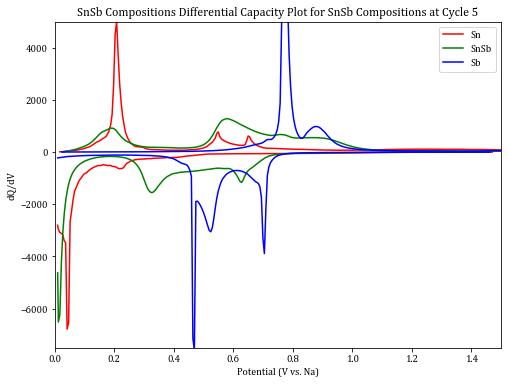

In [44]:
matplotlib.rcParams['figure.figsize'] = 8, 6 #(I don't use this)

cycle=5

discharge = data_by_cycle1.get_group((cycle,discharge_index))['discharge']/mass1*1000
voltage = data_by_cycle1.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv, color='red')
charge = data_by_cycle1.get_group((cycle,charge_index))['charge']/mass1*1000
voltage = data_by_cycle1.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv, color='red', label = 'Sn')

discharge = data_by_cycle2.get_group((cycle,discharge_index))['discharge']/mass2*1000
voltage = data_by_cycle2.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
#plt.plot(voltage, dqdv, color='orange')
charge = data_by_cycle2.get_group((cycle,charge_index))['charge']/mass2*1000
voltage = data_by_cycle2.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
#plt.plot(voltage, dqdv, color='orange', label = '3Sn:Sb')


discharge = data_by_cycle3.get_group((cycle,discharge_index))['discharge']/mass3*1000
voltage = data_by_cycle3.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv, color='green')
charge = data_by_cycle3.get_group((cycle,charge_index))['charge']/mass3*1000
voltage = data_by_cycle3.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv, color='green', label = 'SnSb')

discharge = data_by_cycle4.get_group((cycle,discharge_index))['discharge']/mass4*1000
voltage = data_by_cycle4.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
#plt.plot(voltage, dqdv, color='green')
charge = data_by_cycle4.get_group((cycle,charge_index))['charge']/mass4*1000
voltage = data_by_cycle4.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
#plt.plot(voltage, dqdv, color='green', label = 'Sn:3Sb')

discharge = data_by_cycle5.get_group((cycle,discharge_index))['discharge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv, color='blue')
charge = data_by_cycle5.get_group((cycle,charge_index))['charge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv, color='blue', label = 'Sb')


#plt.tight_layout(pad=3)
plt.xlim(0,1.5)
plt.ylim(-7500,5000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title('SnSb Compositions Differential Capacity Plot for SnSb Compositions at Cycle '+str(cycle))
plt.legend()

#change label
plt.savefig('SnSb Compositions Differential Capacity Plot for SnSb Compositions at Cycle '+str(cycle)+'_large_Sn_Sb_SnSb')
############
plt.show()

### Multiple Cycle Call

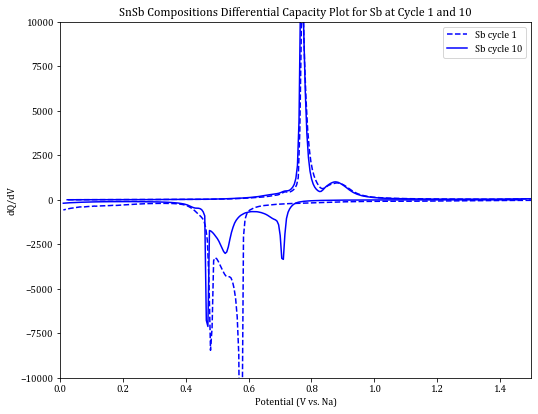

In [45]:
matplotlib.rcParams['figure.figsize'] = 8, 6 #(I don't use this)
name = 'SnSb Compositions Differential Capacity Plot for Sb at Cycle 1 and 10'

cycle=1

discharge = data_by_cycle5.get_group((cycle,discharge_index))['discharge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv,'--', color='blue')
charge = data_by_cycle5.get_group((cycle,charge_index))['charge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv,'--', color='blue', label = 'Sb cycle '+str(cycle))

cycle=10

discharge = data_by_cycle5.get_group((cycle,discharge_index))['discharge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv, color='blue')
charge = data_by_cycle5.get_group((cycle,charge_index))['charge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv, color='blue', label = 'Sb cycle '+str(cycle))

plt.tight_layout(pad=3)
plt.xlim(0,1.5)
plt.ylim(-10000,10000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title(name)
plt.legend()

#change label
plt.savefig(name+'_large')
############
plt.show()

In [ ]:
matplotlib.rcParams['figure.figsize'] = 8, 6 #(I don't use this)
name = 'SnSb Compositions Differential Capacity Plot for Sb at Cycle 1 and 10'

cycle=1

discharge = data_by_cycle5.get_group((cycle,discharge_index))['discharge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv,'--', color='blue')
charge = data_by_cycle5.get_group((cycle,charge_index))['charge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv,'--', color='blue', label = 'Sb cycle '+str(cycle))

cycle=10

discharge = data_by_cycle5.get_group((cycle,discharge_index))['discharge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,discharge_index))['voltage']
dqdv = np.gradient(discharge)/np.gradient(voltage)    
plt.plot(voltage, dqdv, color='blue')
charge = data_by_cycle5.get_group((cycle,charge_index))['charge']/mass5*1000
voltage = data_by_cycle5.get_group((cycle,charge_index))['voltage']
dqdv = np.gradient(charge)/np.gradient(voltage)
plt.plot(voltage, dqdv, color='blue', label = 'Sb cycle '+str(cycle))

plt.tight_layout(pad=3)
plt.xlim(0,1.5)
plt.ylim(-10000,10000)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Na)')
plt.title(name)
plt.legend()

#change label
plt.savefig(name+'_large')
############
plt.show()

# Colormaps

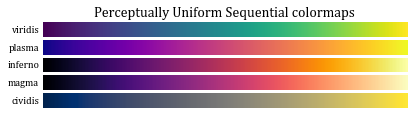

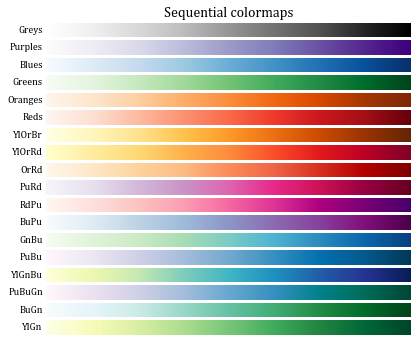

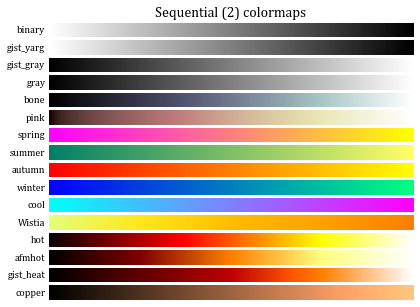

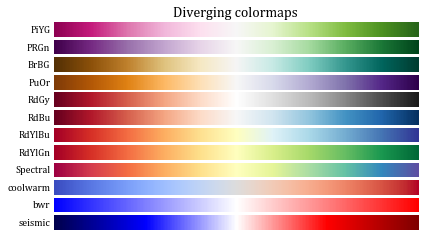

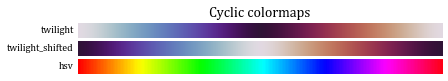

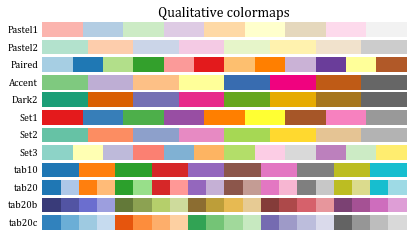

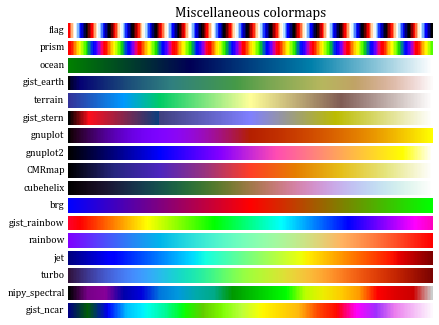

In [46]:
IBMcolors = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']
IBMcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", IBMcolors)


cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()